In [113]:
# Datos
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df_app = pd.read_csv("./dataset/googleplaystore.csv")
df_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [115]:
# Eliminamos filas duplicadas.
# df_app.drop_duplicates(inplace=True)

# Analisis exploratorio de datos

| Columna | Descripción |Tipo de dato | Comentarios |
|---------|-------------|-------------|------------|
| App | Nombre de la aplicación | object (cadena de texto) | |
| Category | Categoría a la que pertenece la aplicación | category | |
| Rating | Calificación general de los usuarios de la aplicación | float32 (número decimal) | |
| Reviews | Número de reseñas de usuarios para la aplicación | int64 (número entero) | |
| Size | Tamaño de la aplicación | int (número entero) unidad (Mega) | 0 = Varies with device|
| Installs | Número de descargas/instalaciones de usuarios para la aplicación | int64 (número entero) | |
| Type | Tipo de aplicación (gratuita o de pago) | category | |
| Price | Precio de la aplicación | float32 (número flotante) | |
| Content Rating | Grupo de edad al que está dirigida la aplicación: niños / mayores de 21 años / adultos | category | |
| Genres | Una aplicación puede pertenecer a varios géneros (aparte de su categoría principal) | object (cadena de texto)| |
| Last Updated | Fecha actualizada en la que la aplicación se actualizó por última vez en Play Store | datetime64[ns] (fecha y hora) | |
| Current Ver | Versión actual de la aplicación disponible en Play Store | object (cadena de texto) | | 
| Android Ver | Versión mínima de Android requerida para ejecutar la aplicación | object (cadena de texto) ||

In [116]:
# Información del dataset.
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [180]:
# Calcular el número de NaN por columna
nan_count = df_app.isnull().sum()

# Mostrar solo las columnas con más de cero NaN
print(nan_count[nan_count > 0])

Rating         1474
Type              1
Current Ver       8
Android Ver       2
dtype: int64


# A) Analizamos los tipos de datos

In [118]:
# Borramos la fila que contine el valor 1.9 en la columna Category esta fila no tiene sentido.
df_app = df_app[df_app.Category != '1.9']

## Columna `Category`

In [119]:
# La variable "Category", la consideramos como categórica. Con esto nos ahorraremos un poco de memoria.
print("Cantidad de caterias en 'Category':", df_app["Category"].value_counts().count())
df_app["Category"] = df_app["Category"].astype("category")

Cantidad de caterias en 'Category': 33


## Columna `Rating`

In [120]:
df_app['Rating'] = df_app['Rating'].astype("float32")

## Columna `Rewiers`

In [121]:
# La variable "Reviews" la consideramos como numérica.
# Primero se lo convirtio a un tipo de dato int64, pero al ver el maximo valor de la columna no supera el valor de 2^(32 - 1) (2147483647) se lo convirtio a int32.
df_app["Reviews"] = df_app["Reviews"].astype('int32')

## Columna `Size`

In [122]:
# Columna "Size" de tipo numérica.
# Reemplazamos los "Varies with device" por 0.
df_app["Size"] = df_app["Size"].replace("Varies with device", 0)    

In [123]:
# Función que elimina la letra "M" y "k" y lo convierte a float32 con la unidad de medida en Mega.
def convert_to_mega(value):
    if isinstance(value, str):
        if 'M' in value:
            return float(value.replace('M', ''))
        elif 'k' in value:
            return float(value.replace('k', '')) / 1000
    return float(value) / 1000000

In [124]:
# Nos quedamos con unidad de medida M = Mega, ya que es la usada en la Play Store.
df_app['Size'] = df_app['Size'].apply(convert_to_mega)

df_app["Size"] = df_app["Size"].astype("float32")

## Columna `Installs`

In [125]:
# Funcion que elimina los sibolos [',', '+'] y retorna un int.
def convert_to_int(value):
    if isinstance(value, str):
        return int(value.replace(',', '').replace('+', ''))
    return int(value)

In [126]:
# Cramos una funcion para quitar las comas y el simbolo * de la columna "Installs".
df_app['Installs'] = df_app['Installs'].apply(convert_to_int)


## Columna `Type`

In [127]:
 # La variable "Type" es categórica. Dos valores posibles: Free o Paid.
df_app["Type"] = df_app["Type"].astype("category")  

## Columna `Price`

In [128]:
# La columna "Price" es de tipo object, pero tiene valores numéricos y letras ($). Eliminos el signo "$" y la convertimos a numérica.
df_app["Price"] = df_app["Price"].astype("str").str.replace("$", "")

# Convertimos la columna "Price" a float32.
df_app["Price"] = df_app["Price"].astype("str").astype("float32")

## Columna `Content Rating`

In [129]:
# La columna "Content Rating" es categórica.
df_app["Content Rating"] = df_app["Content Rating"].astype("category")

## Columna `Genres` (sin cambio de tipo de dato)

In [130]:
# Analizamos la columna "Genres", como esta compuesta.
a = df_app["Genres"].value_counts();
print("Cantidad de generos: ", a.count())

# Ejemplo de como esta compuesta la columna:
# La variable "Genres" contine varios generos separados por ";" o "&".
mask = a.index.str.contains("Strategy")
result = a[mask]
print(result)

Cantidad de generos:  119
Genres
Strategy                       107
Strategy;Action & Adventure      2
Strategy;Education               1
Strategy;Creativity              1
Name: count, dtype: int64


## Columna `Last Updated` (fecha)

In [131]:
# Convertir la columna 'fecha' a tipo fecha
df_app['Last Updated'] = pd.to_datetime(df_app['Last Updated'])

## Columna `Android Ver` (sin cambio de tipo de dato)

In [132]:
df_app["Android Ver"].value_counts().count()

33

# B) Primera parte - Visualización de Dato

### Histograma.

**Regla de Sturges**
Una de las reglas prácticas acerca del número de clases que deben considerar al elaborarse un histograma.
Este número viene dado por la siguiente expresión:

$$ c=1+\log_{2}(M) \quad \text{donde M es el tamaño de la muestra.}$$



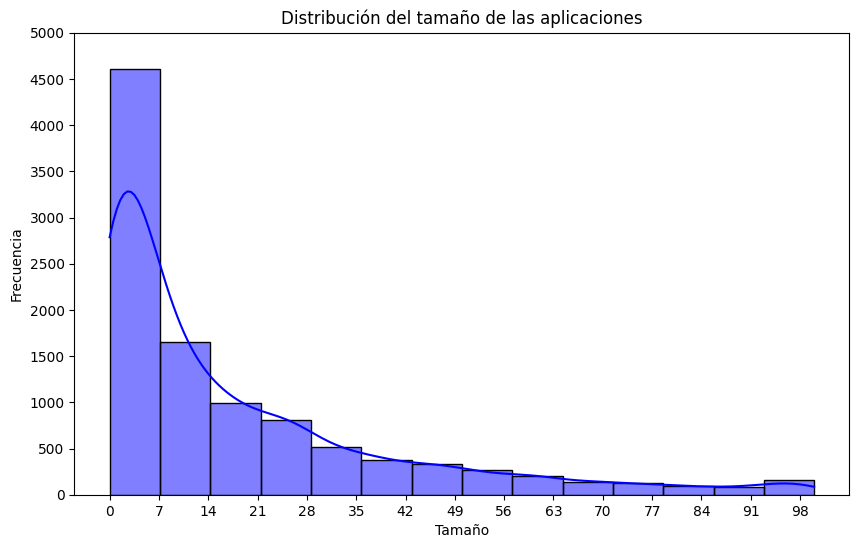

In [21]:
# Hacemos un hstogram de la variable "Reviews". Colocamos 14 bins.
plt.figure(figsize=(10, 6))
sns.histplot(data=df_app, x="Size", bins=14, kde=True, color="blue")
plt.title("Distribución del tamaño de las aplicaciones")
plt.xlabel("Tamaño")
plt.ylabel("Frecuencia")
plt.xticks(range(0, 100, 7))
plt.yticks(range(0, 5001, 500))
plt.show()


### Boxplot

Text(0.5, 1.0, 'Distribución de las calificaciones por grupo de edad')

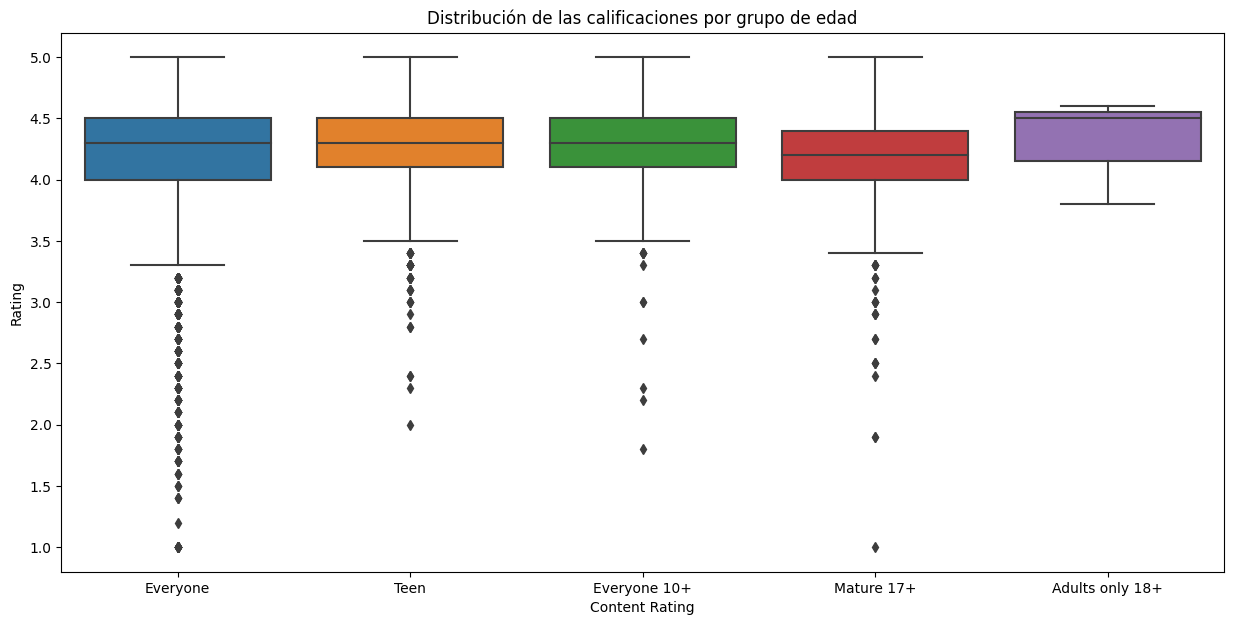

In [22]:
# Para identificar la presencia de valores atípicos.
plt.figure(figsize=(15,7))
sns.boxplot(data=df_app[df_app["Content Rating"] != "Unrated"], x="Content Rating", y="Rating")
plt.title("Distribución de las calificaciones por grupo de edad")

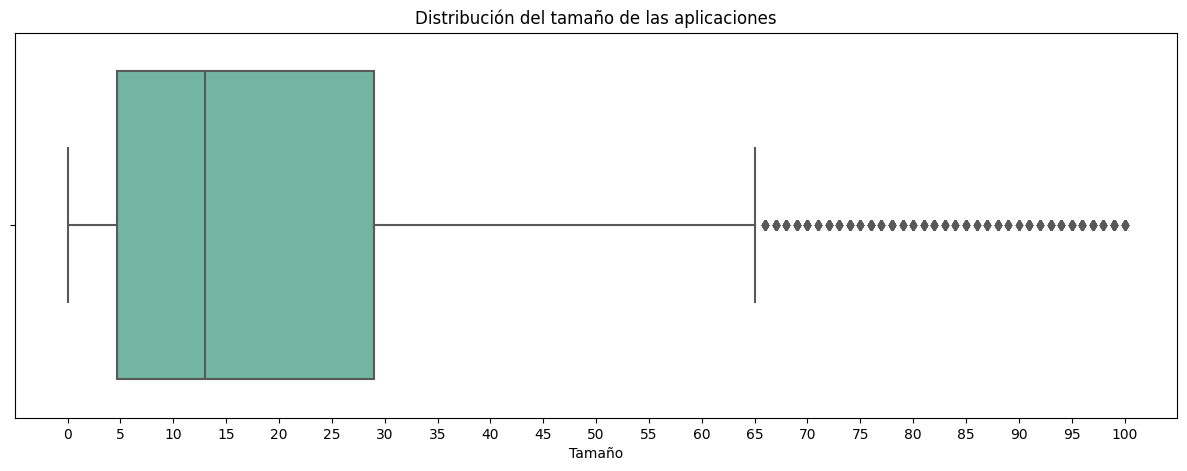

In [23]:
# Para identificar la presencia de valores atípicos.
plt.figure(figsize=(15,5))
sns.boxplot(data=df_app[df_app["Size"] != 0], x='Size', palette='Set2')
plt.title("Distribución del tamaño de las aplicaciones")
plt.xlabel("Tamaño")
plt.xticks(range(0, 101, 5))
plt.show()

### Heatmap 

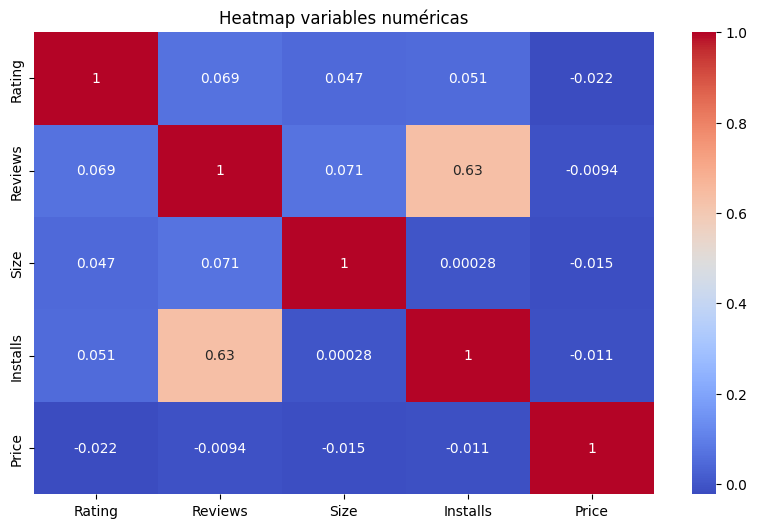

In [24]:
# Seleccionamos la variables para hacer un heatmap.
df_heatmap = df_app[["Rating", "Reviews", "Size", "Installs", "Price"]].corr(method="pearson")

# Hacemos un heatmap de las variables seleccionadas.
plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, annot=True, cmap="coolwarm")
plt.title("Heatmap variables numéricas")
plt.show()


### Punto 2

Realizar un plot sobre los datos, utilizando un tipo de plot que no sea ninguno de los usados en el punto uno, que permita mostrar el comportamiento o interacción de al menos tres variables. (3ptos)

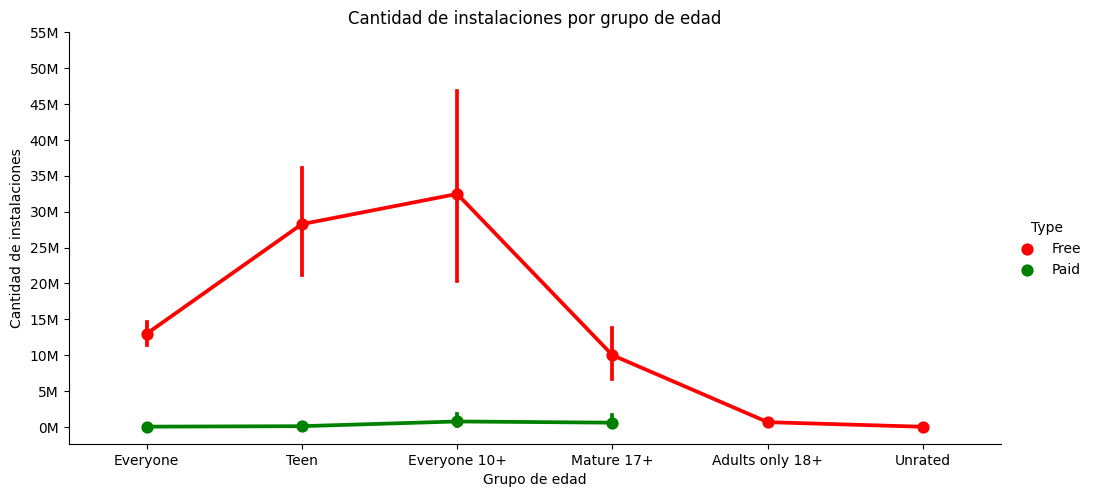

In [39]:
sns.catplot(data=df_app, x="Content Rating", y="Installs", hue="Type", kind="point", height=5, aspect=2, palette=['r', 'g'])
plt.title("Cantidad de instalaciones por grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Cantidad de instalaciones")
plt.yticks(np.arange(0, 6e7, step=0.5e7))
plt.gca().yaxis.set_major_formatter(lambda x, _: '{:0.0f}M'.format(x/1e6))
plt.show()


# Borradores

In [ ]:
df_app["Content Rating"].value_counts()

Content Rating
Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

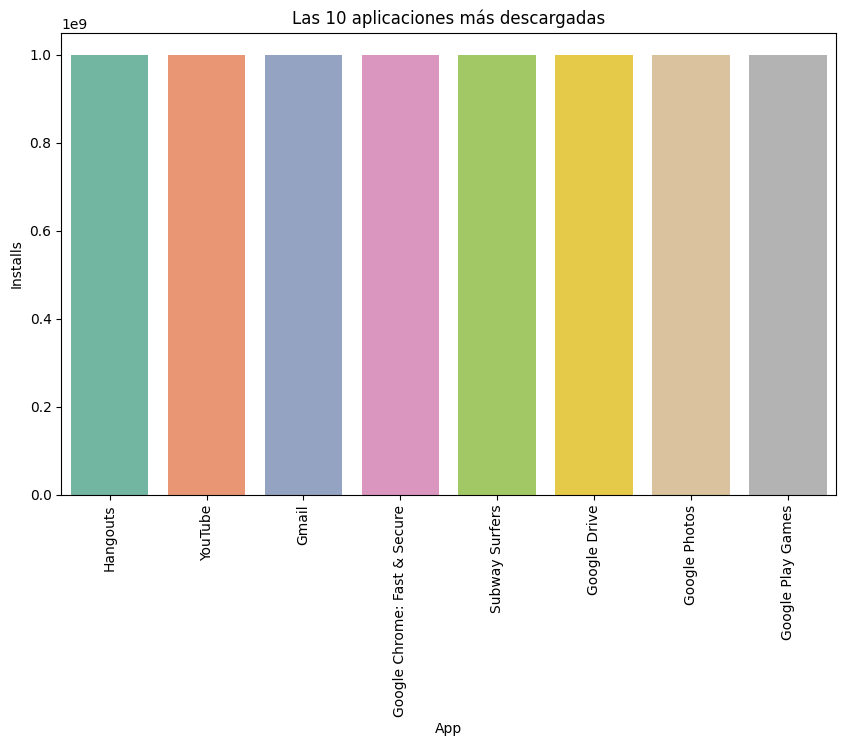

In [ ]:
# Graficamos las 10 aplicaciones más descargadas.
plt.figure(figsize=(10, 6))
sns.barplot(data=df_app.sort_values(by="Installs", ascending=False).head(10), x="App", y="Installs", palette="Set2")
plt.title("Las 10 aplicaciones más descargadas")
plt.xticks(rotation=90)
plt.show()


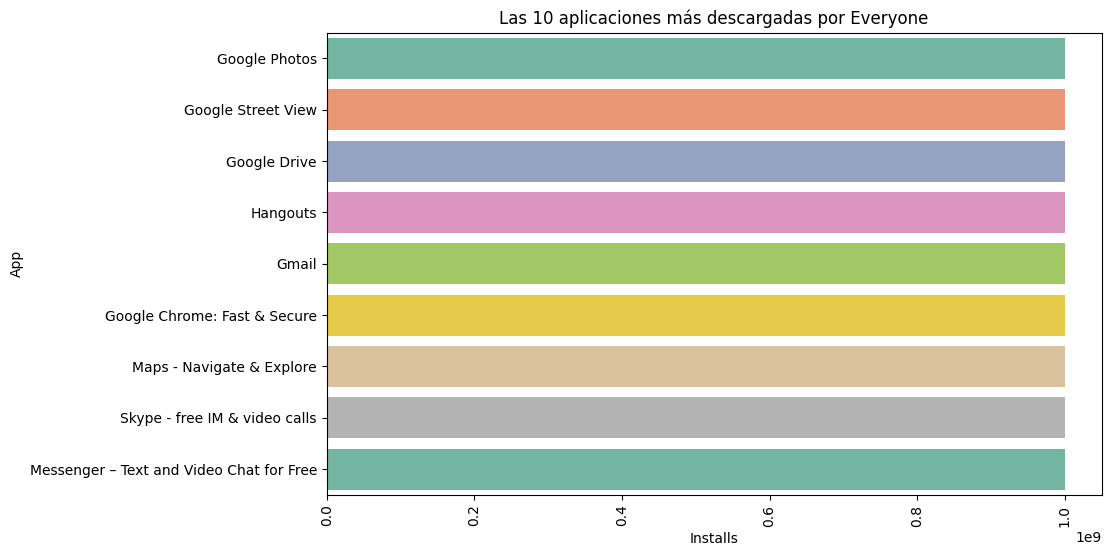

In [ ]:
# Graficamos las 10 aplicaciones más descargadas por Everyone
plt.figure(figsize=(10, 6))
sns.barplot(data=df_app[df_app["Content Rating"] == "Everyone"].sort_values(by="Installs", ascending=False).head(10), y="App", x="Installs", palette="Set2")
plt.title("Las 10 aplicaciones más descargadas por Everyone")
plt.xticks(rotation=90)
plt.show()


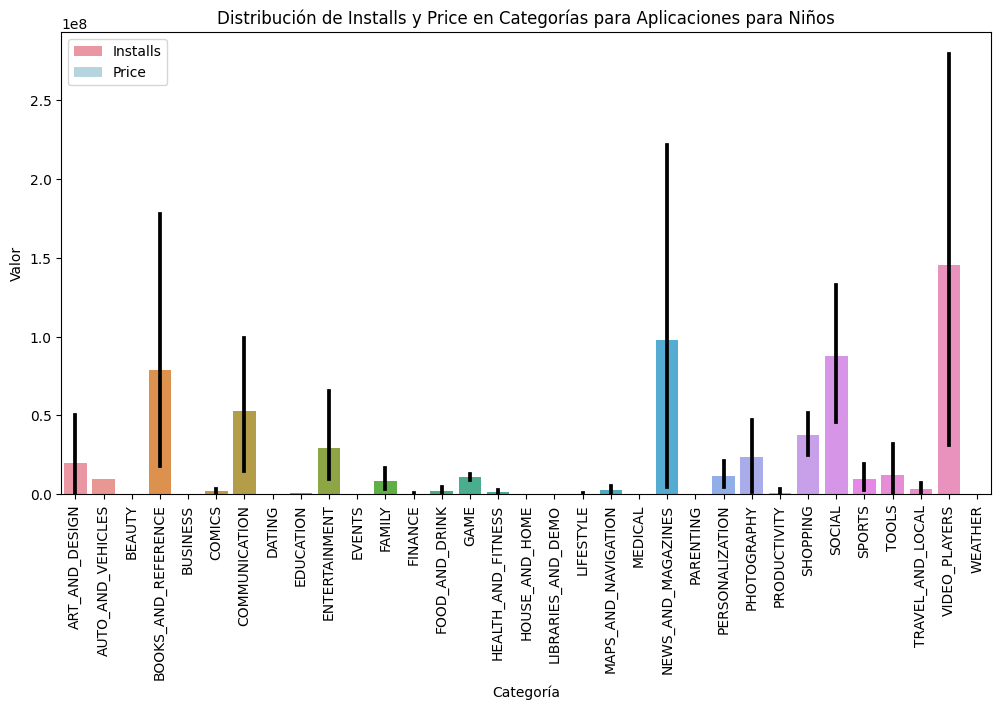

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el DataFrame para obtener solo las aplicaciones dirigidas a niños
children_apps = df_app[df_app['Content Rating'] == 'Teen']

# Seleccionar las tres variables de interés
variables = ['Category', 'Installs', 'Price']
children_apps = children_apps[variables]

# Crear el gráfico de barras apiladas
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Installs', data=children_apps, errcolor='black', label='Installs')
sns.barplot(x='Category', y='Price', data=children_apps, errcolor='black', label='Price', color='lightblue')

# Personalizar el gráfico
plt.xlabel('Categoría')
plt.ylabel('Valor')
plt.title('Distribución de Installs y Price en Categorías para Aplicaciones para Niños')
plt.legend()

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


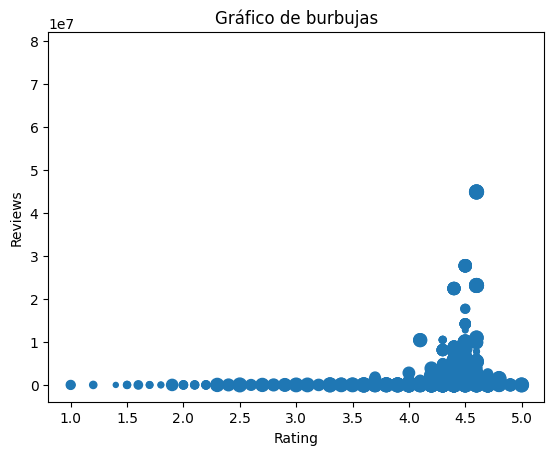

In [ ]:
# Crear el gráfico
plt.scatter(df_app['Rating'], df_app['Reviews'], s=df_app['Size'])
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.title('Gráfico de burbujas')
plt.show()

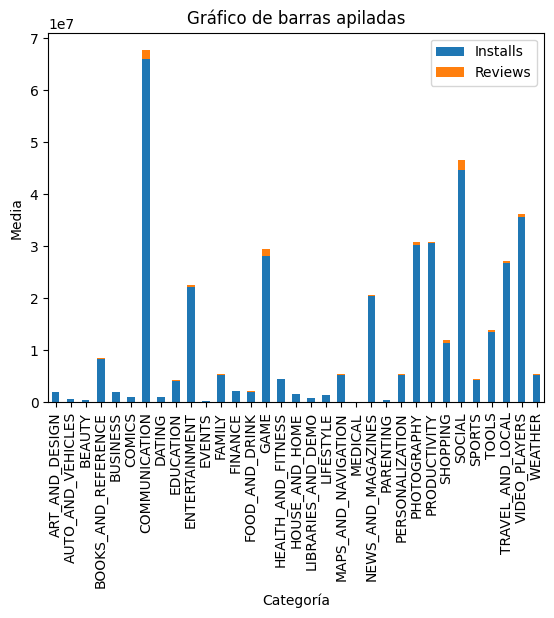

In [ ]:
# Agrupar por categoría y calcular la media de las calificaciones y reseñas
grouped = df_app.groupby('Category').agg({'Installs': 'mean', 'Reviews': 'mean'}).reset_index()

# Crear el gráfico
grouped.plot(x='Category', y=['Installs', 'Reviews'], kind='bar', stacked=True)
plt.xlabel('Categoría')
plt.ylabel('Media')
plt.title('Gráfico de barras apiladas')
plt.show()


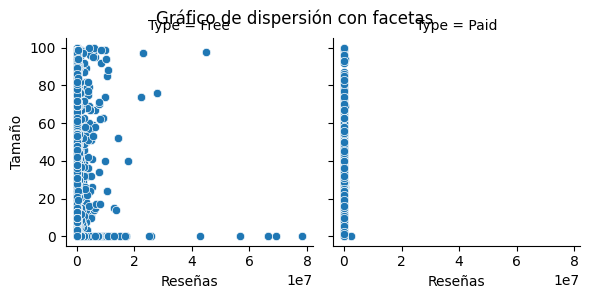

In [ ]:
# Crear el gráfico
g = sns.FacetGrid(df_app, col='Type')
g.map(sns.scatterplot, 'Reviews', 'Size')
g.set_axis_labels('Reseñas', 'Tamaño')
g.fig.suptitle('Gráfico de dispersión con facetas')
plt.show()

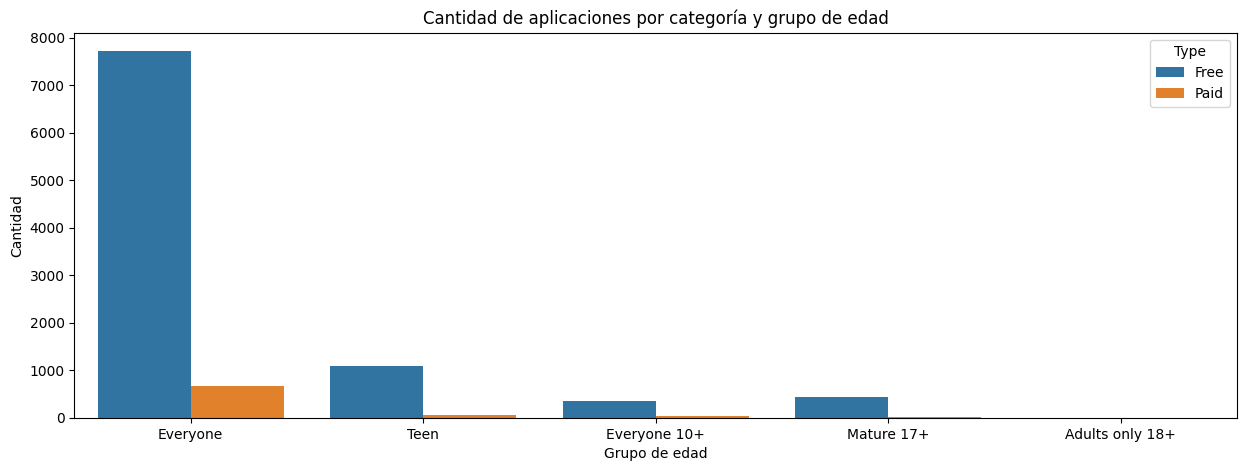

In [ ]:
# Gafco de barras de la variable "Category" que comtenga las aplicaciones distintas de "Unrated", para niños y adultos.
plt.figure(figsize=(15, 5))
sns.countplot(data=df_app[df_app["Content Rating"] != "Unrated"], x="Content Rating", hue="Type")
plt.title("Cantidad de aplicaciones por categoría y grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Cantidad")
plt.show()


In [ ]:
df_app["Installs"].sort_values(ascending=False)

341     1000000000
3928    1000000000
451     1000000000
3996    1000000000
1700    1000000000
           ...    
9719             0
8871             0
9337             0
5486             0
6692             0
Name: Installs, Length: 10357, dtype: int64

/tmp/ipykernel_5213/2691638233.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(data=df_app, y="Category", x="Size", order=df_app["Category"].value_counts().index, palette="Set2")


<Figure size 1500x800 with 0 Axes>

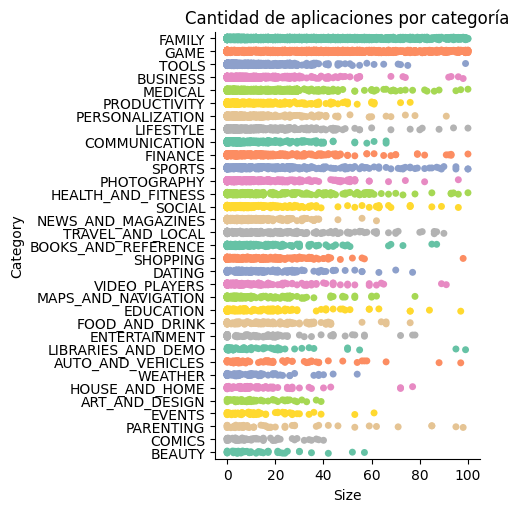

In [ ]:
# Mostramos unicamente las 10 categorias con más aplicaciones.
plt.figure(figsize=(15, 8))
sns.catplot(data=df_app, y="Category", x="Size", order=df_app["Category"].value_counts().index, palette="Set2")
plt.title("Cantidad de aplicaciones por categoría")
plt.show()

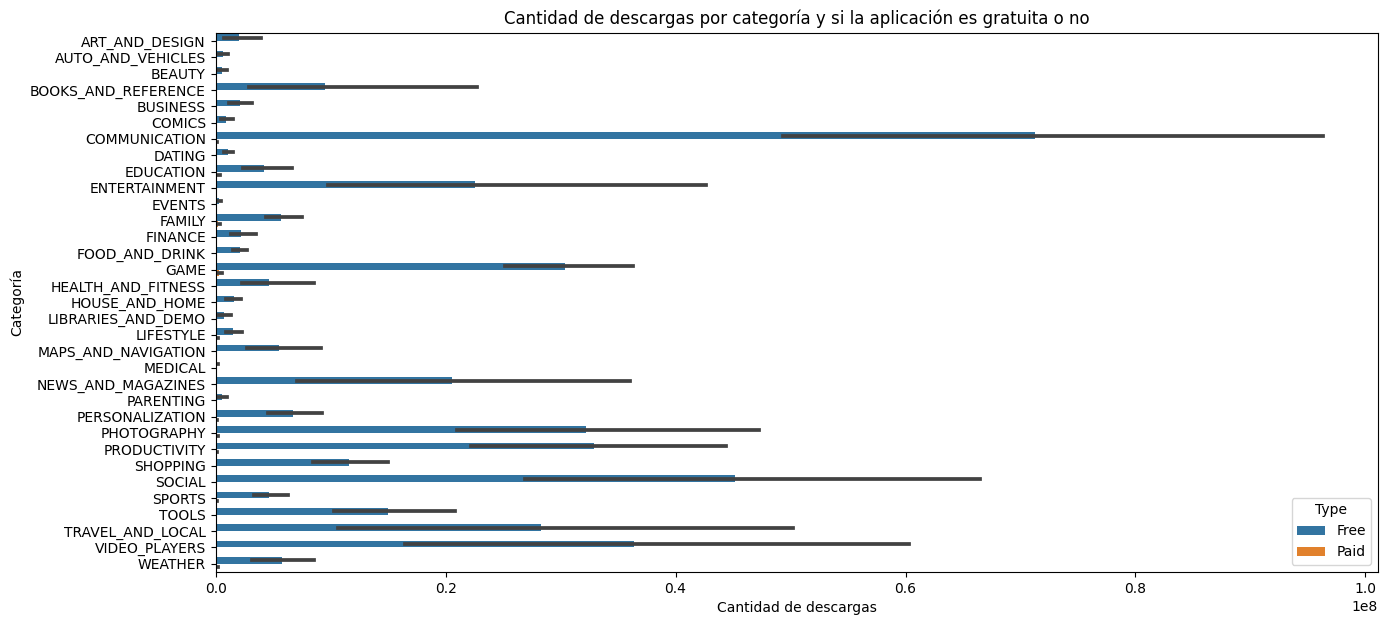

In [ ]:
# Bar plot de la cantidad de descargas por categoría y si la aplicaicon es gratuita o no.
plt.figure(figsize=(15, 7))
sns.barplot(data=df_app, x="Installs", y="Category", hue="Type")
plt.title("Cantidad de descargas por categoría y si la aplicación es gratuita o no")
plt.xlabel("Cantidad de descargas")
plt.ylabel("Categoría")
plt.show()

Text(0, 0.5, 'Categoría')

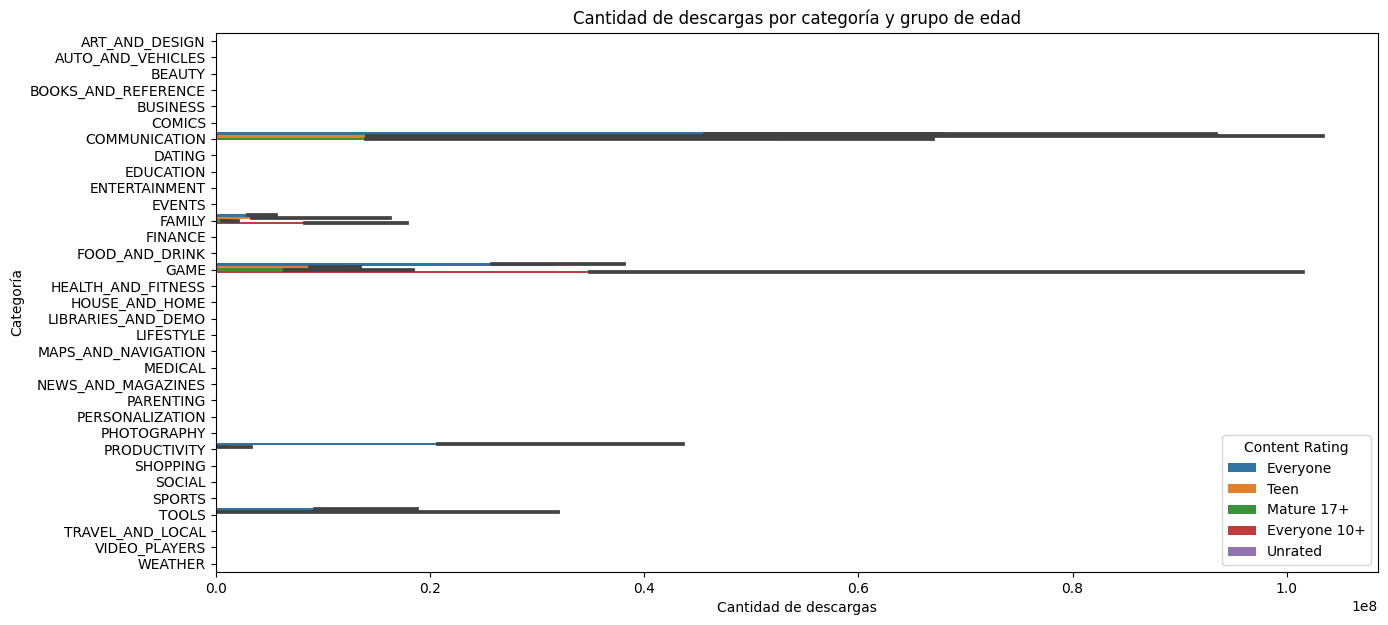

In [ ]:
# Grafico barras de las 5 categorias con mayor cantidad de descargas, para Content Rating = Teen y Not teen.
plt.figure(figsize=(15, 7))
sns.barplot(data=df_app[df_app["Category"].isin(["GAME", "COMMUNICATION", "TOOLS", "FAMILY", "PRODUCTIVITY"])], x="Installs", y="Category", hue="Content Rating")
plt.title("Cantidad de descargas por categoría y grupo de edad")
plt.xlabel("Cantidad de descargas")
plt.ylabel("Categoría")

In [ ]:
df_app["Type"].value_counts()

Type
Free    9591
Paid     765
Name: count, dtype: int64

# C) Pandas

## Pandas (⭐)

### 9) ¿Cuál es la aplicación que generó más dinero? (⭐)

In [147]:
# Función que calcula el dinero generado por cada aplicación.
def revenue(row):
  return row["Price"] * row["Installs"]

# Aplico la función max(), sobre las filas del dataFrame con el argumento key igual a la función revenue.
# Se obtiene la primera fila con el mayor valor de revenue.
df_app_top = max(df_app.iterrows(), key=lambda x: revenue(x[1]))[1]

# Mostrar la información de la aplicación que generó más dinero
print(df_app_top)


App                               Minecraft
Category                             FAMILY
Rating                                  4.5
Reviews                             2376564
Size                                    0.0
Installs                           10000000
Type                                   Paid
Price                                  6.99
Content Rating                 Everyone 10+
Genres            Arcade;Action & Adventure
Last Updated            2018-07-24 00:00:00
Current Ver                         1.5.2.1
Android Ver              Varies with device
Name: 2241, dtype: object


### 11) ¿Cuál es la aplicación con mayor promedio de score de sentimiento subjetivo? (⭐)

In [152]:
df_reviews = pd.read_csv("./dataset/googleplaystore_user_reviews.csv")
df_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
# Aplicación con mayor promedio de score de sentimiento subjetivo
#df_reviews.groupby("App")["Sentiment_Subjectivity"].mean().sort_values(ascending=False).head(1)


App
Google Slides    0.916667
Name: Sentiment_Subjectivity, dtype: float64

In [170]:
# Agrupar el dataFrame por la columna App
df_app_grouped = df_reviews.groupby("App")

# Calcular el promedio de la columna Sentiment_Subjectivity para cada grupo
df_app_mean = df_app_grouped["Sentiment_Subjectivity"].mean()

# Usar la función max de Python sobre los valores del dataFrame con el argumento key igual a la función mean
df_app_top = max(df_app_mean.items(), key=lambda x: x[1])

# Mostrar el nombre y el promedio de subjetividad de la aplicación con el mayor promedio de score de sentimiento subjetivo
print("name: ", df_app_top[0], "\n", "mean:", df_app_top[1])


name:  Google Slides 
 mean: 0.9166666666666666


## Pandas (⭐⭐)

### 24) Indica las 10 apps de categoría Sport con sentimiento positivo y mayor rating.(⭐⭐)

In [171]:
df_sport = df_app[df_app["Category"] == "SPORTS"][["App","Rating"]] # Filtramos por "Category" = "SPORTS".
df_positive_reviews = df_reviews[df_reviews['Sentiment'] == 'Positive']["App"]  # Filtramos por "Sentiment" = "Positive".

data_inner = pd.merge(df_sport, df_positive_reviews,on = "App", how = "inner") # Hacemos un merge de los dos dataframes, sobre la columna "App" y "inner" = interseccion.

data_inner.drop_duplicates(inplace=True)    # Eliminamos los duplicados.
data_inner.sort_values(by="Rating", ascending=False).head(10)   # Mostramos los 10 primeros.

,App,Rating
2199,Dream League Soccer 2018,4.6
1724,FanDuel: Daily Fantasy Sports,4.6
1648,Golf GPS Rangefinder: Golf Pad,4.6
1496,Golf GPS by SwingxSwing,4.6
1889,850 Sports News Digest,4.6
1199,All Football - Latest News & Videos,4.6
1927,365Scores - Live Scores,4.6
1269,"All Football GO- Live Score, Games",4.6
1467,"GolfNow: Tee Time Deals at Golf Courses, Golf GPS",4.5
1937,Cricbuzz - Live Cricket Scores & News,4.5


### 28) Calcule el tamaño promedio de las aplicaciones por versión de Android, sin tener en cuenta las aplicaciones que varían en tamaño según dispositivo. (⭐⭐)

In [181]:
# Recordar que en la variable "Size" los datos que tienen 0 = "Varies with device".
# "groupby" ignora los valores NaN y los valores de "Size" no tienen NaN.
df_app[df_app["Size"] != 0].groupby("Android Ver")[["Size"]].mean().head()


,Size
Android Ver,
1.0 and up,3.855500
1.5 and up,5.071631
1.6 and up,3.119138
2.0 and up,6.256806
2.0.1 and up,22.222141


### 36) Devolver las categorías que tengan una app dominante de nivel K. Una app es dominante a nivel K si la cantidad de descargas es mayor al número de de descarga de las k siguientes apps ordenadas según el número de descargas. (⭐⭐)

In [182]:
# Recibe como parametro un DataFrame y un valor de K.
# Retorna una lista de las categorías con apps dominantes de nivel K
def categorias_con_apps_dominantes(df, k):
    # Agrupar el DataFrame por categoría y ordenar por el número de descargas
    df = df.sort_values('Installs', ascending=False).groupby('Category')
    
    # Crear un diccionario vacío para almacenar las categorías y sus apps dominantes de nivel K
    categorias = {}
    
    # Iterar sobre cada grupo (categoría)
    for categoria, grupo in df:
        # Crear una lista vacía para almacenar las apps dominantes de nivel K en esta categoría
        apps_dominantes = []
        
        # Iterar sobre cada aplicación en el grupo
        for i in range(len(grupo)):
            # Verificar si la aplicación tiene más descargas que la aplicación en la posición i + k
            if i + k < len(grupo) and grupo.iloc[i]['Installs'] > grupo.iloc[i + k]['Installs']:
                # Si es así, agregar la aplicación a la lista de apps dominantes de nivel K
                apps_dominantes.append(grupo.iloc[i]['App'])
        
        # Si hay apps dominantes de nivel K en esta categoría, agregar la categoría y sus apps al diccionario
        if apps_dominantes:
            categorias[categoria] = apps_dominantes
    
    return categorias

In [183]:
# Elegi el valor de k = 500, porque es el valor que mas me gusto.
K = 500
categorias_con_apps_dominantes(df_app, K).keys()

dict_keys(['FAMILY', 'GAME', 'TOOLS'])

# D) Spark

# Spark (⭐)

### 2) Teniendo en cuenta las reviews que reciben las aplicaciones, devolver una (al azar) de la aplicación que haya recibido la mayor cantidad de reviews positivas. (⭐)